In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-kj49vils because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


,공부시간(x),시험점수(t)
0,1,5
1,2,7
2,3,20
3,4,31
4,5,40


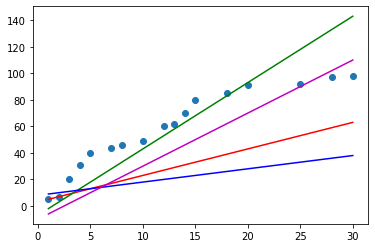

In [2]:
df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

display(df.head())

plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
plt.plot(df['공부시간(x)'], df['공부시간(x)']*2 + 3, color='r')
plt.plot(df['공부시간(x)'], df['공부시간(x)']*5 - 7, color='g')
plt.plot(df['공부시간(x)'], df['공부시간(x)']*1 + 8, color='b')
plt.plot(df['공부시간(x)'], df['공부시간(x)']*4 - 10, color='m')
plt.show()

In [3]:
# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)

# model => y = Wx + b
# rand() => 0과 1사이의 난수를 균등분포에서 발생시켜요!
W = np.random.rand(1, 1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):

    input_W = input_data[0]
    input_b = input_data[1]

    # y = xW + b
    y = np.dot(x_data, input_W) + input_b

    return np.mean(np.power((t_data - y), 2))

# 미분해주는 함수가 있어야 해요!
def numerical_derivative(f, x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# 학습이 다 종료되면(모델이 다 만들어지면)
# 예측작업을 해야 해요! 그래서 예측을 해주는 함수를 하나 정의
def predict(x):

    return np.dot(x, W) + b

# learning rate 정의
learning_rate = 1e-4

# 학습을 진행
for step in range(300000):

    # 현재 W는 2차원, b는 1차원이예요!
    # 그런데 이게 loss함수안으로 들어갈때는 1차원 안에 두 값이
    # 순서대로 들어가 있어야 해요!
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(-1, 1)
    b = b - derivative_result[1]

    # 확인작업
    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')

W : [[0.47018615]], b : [0.60635211], loss : 29.651999191078083
W : [[1.99719322]], b : [1.01013338], loss : 1.8691813109057066e-05
W : [[1.99898211]], b : [1.00367491], loss : 2.458309874641799e-06
W : [[1.99963086]], b : [1.00133272], loss : 3.2331199785235236e-07
W : [[1.99986613]], b : [1.00048332], loss : 4.252134730270335e-08
W : [[1.99995145]], b : [1.00017528], loss : 5.5923225509863185e-09
W : [[1.99998239]], b : [1.00006356], loss : 7.354910766152505e-10
W : [[1.99999361]], b : [1.00002305], loss : 9.673031537672738e-11
W : [[1.99999768]], b : [1.00000836], loss : 1.2721777598850625e-11
W : [[1.99999916]], b : [1.00000303], loss : 1.673142752113724e-12


In [4]:
predict_result = predict(np.array([7]).reshape(1, 1))
print(predict_result)

[[14.99999897]]


In [5]:
# Tensorflow Keras 구현

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)

# Model 생성
model = Sequential()

# Model안에 layer를 생성
model.add(Flatten(input_shape=(1,)))
model.add(Dense(units=1,
                activation='linear'))

# 모델이 완성되었으면 compile 옵션들을 설정해야 해요!
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='mse')

# 모델의 학습
model.fit(x_data,
          t_data,
          epochs=5000,
          verbose=0)

In [6]:
# 예측을 해 보아요!
print(model.predict(np.array([[10]])))  # [[21.000032]]

[[21.000032]]


In [7]:
# sklearn 구현
# sklearn은 일반사람들도 쉽고 편하게 머신러닝을 할 수 있도록
# 모델을 제공해줘요!

from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
t_data = np.array([3, 5, 7, 9, 11]).reshape(5, 1)

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data,
                  t_data)
print(sklearn_model.predict(np.array([[10]])))  # [[21.]]

[[21.]]


In [8]:
# ozone.csv 파일을 이용해서 머신러닝 모델을 만들어 보아요!
# python 구현

def numerical_derivative(f, x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:

        idx = it.multi_index

        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()

    return derivative_x

# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\11.29\ozone.csv")
# display(df)  # 153 rows × 6 columns

# 아직은 simple linear regression얘기를 하는 중이기 때문에
# 독립변수를 1개만 사용할꺼예요 => Temp만 사용할거예요!
# 종속변수는 Ozone을 이용할거예요

# 그러면 먼저 사용할 데이터를 추출해보아요!
training_data = df[['Temp', 'Ozone']]
# display(training_data)  # 153 rows × 2 columns

# 데이터 처리를 좀 해야해요!
# 일단은 결측치부터 처리해야 해요!
# 이런 결측치를 처리하는 두가지 방식이 있어요!
# 1. 결측치를 삭제
#    데이터량이 충분히 많을때 삭제
#    일반적으로 10만개를 기준으로 데이터량의 많고 적음을 삼아요!

# 2. Imputation을 진행(결측치를 다른 값으로 대체)
#    데이터량이 충분하지 않은 경우
#    그럼 어떤값으로 대체해야 하나요? => 기본 통계값(최대, 최소, 평균, 최빈, 중위)으로 대체
#    머신러닝을 이용해서 값을 대체

# 삭제해서 사용해 보아요
training_data = training_data.dropna(how='any')
display(training_data)  # 116 rows × 2 columns

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0
